# 05 - The Unreasonable Effectiveness of Linear Regression


## All You Need is Regression

앞서 배웠듯, 인과 추론에서 각 개인에게서 얻을 수 있는 결과값은 두 가지가 있습니다. 그 개인이 처치를 받지 않았을 때 얻는 결과 $Y_0$과, 처치를 받았을 때 결과인 $Y_1$이죠. 처치 $T$의 값이 0 또는 1로 정해지면 그에 따라 잠재적 결과 중 하나를 확인할 수 있습니다. 대신 다른 하나는 영영 알 수 없게 되죠. 그렇기 때문에, 개인에 대한 처치 효과(individual treatment effect) $\delta_i = Y_{1i} - Y_{0i}$는 알 수 없습니다.

$
Y_i = Y_{0i} + T_i(Y_{1i} - Y_{0i}) = Y_{0i}(1-T_i) + T_i Y_{1i}
$

그러니 좀 더 쉬운 일을 해봅시다. 평균적인 인과 효과(Average treatment effect)를 추정하는 것입니다. 처치를 받았을 때, 어떤 사람들은 다른 사람들보다 더 잘 반응합니다. 우리는 누가 그런 사람들인지 알 수 없고요. 이 사실을 인정하고, 대신 처치를 받았을 때 **평균적으로** 어떤 효과가 나타나는지를 확인해봅시다.

$
ATE = E[Y_1 - Y_0]
$

이러면 더 간단한 모형을 얻을 수 있습니다. 여기서 일정한 처치 효과 $\kappa$는 식 $Y_{1i} = Y_{0i} + \kappa$를 만족합니다. $\kappa$가 양수라면, 평균적으로 처치가 양의 효과를 가지고 있다고 말합니다. 어떤 개인들은 처치를 받고 더 낮은 결과를 낼 수도 있지만 평균적으로는 양의 효과를 가지는 거죠.

편향(bias) 때문에 평균의 차이 $E[Y|T=1] - E[Y|T=0]$와 $E[Y_1 - Y_0]$는 다르다고 했던 것 기억하시나요? 이런 편향은 처치 집단과 비처치 집단이 처치 여부 외에 다른 측면에서도 갈라질 때 발생합니다. 편향을 확인하는 한 가지 방법은, 두 집단에서 잠재적 결과 $Y_0$의 차이가 있는지를 보는 것입니다.

$
E[Y|T=1] - E[Y|T=0] = \underbrace{E[Y_1 - Y_0|T=1]}_{ATET} + \underbrace{\{ E[Y_0|T=1] - E[Y_0|T=0]\}}_{BIAS}
$

앞서, 우리는 무작위 실험 또는 **무작위 대조 실험(Randomized Controlled Trial, RCT)**을 이용해 편향을 제거할 수 있다고 배웠습니다. RCT는 처치 집단과 비처치 집단을 동일하게 만듭니다. 그 덕분에 편향을 없앨 수 있죠. 또한, 우리는 처치 효과에 대한 추정치 주변에 불확실성 수준(uncertainty level)을 두는 방법도 배웠습니다. 대면 강의는 $T=0$, 온라인 강의는 $T=1$으로 나타낸 사례를 살펴보았죠? 이 두 가지 유형의 강의에 학생들을 무작위로 배정한 후 시험 성적을 평가했습니다. 그리고 두 그룹을 비교하여 평균 처치 효과를 계산하고, 그 주위의 신뢰 구간까지 얻어낼 수 있는 A/B 검사 도구를 만들었습니다.

그런데 인과 추론에는 이 모든 작업을 한번에 할 수 있는 마법의 도구가 있습니다. 바로 **선형 회귀(linear regression)**입니다! 처치 그룹과 비처치 그룹의 평균을 비교하는 것이 그냥 커피라면, 선형 회귀는 TOP입니다. 또는 처치/비처치 그룹을 비교하는 것이 그냥 식빵이라면, 선형 회귀는 100도로 끓인 물로 반죽하는 탕종공법으로 만들어 수분 함량이 높아 최상의 촉촉함과 찰진 식감을 살린 프리미엄 식빵입니다.

![img](./data/img/linear-regression/you_vs.png)

이 멋쟁이가 어떻게 작용하는지 봅시다. 아래 코드는 온라인 수업과 대면 수업을 비교하는 분석을 똑같이 실행합니다. 하지만 온갖 수식을 거쳐 신뢰 구간을 계산할 필요 없이 그냥 회귀 분석을 실행하면 됩니다. 구체적으로 말하자면 다음 모형을 추정하게 됩니다.

$
exam_i = \beta_0 + \kappa \ Online_i + u_i
$

온라인 수업의 경우, 시험 성적 추정치는 베이스라인 $\beta_0$에다가 $\kappa$를 더한 값입니다. 물론 시험 성적은 추가적인 변수(시험 당일 학생의 기분, 공부 시간 등)에 의해서도 결정됩니다. 하지만 우리는 그런 연관 관계에는 관심이 없습니다. 대신, 우리가 신경쓰지 않는 모든 것들은 $u_i$ 항에 포함시킵니다. 이를 모형 오차(model error)라고 합니다.

$Online$은 처치를 받는지를 나타내는 더미 변수입니다. 대면 수업을 들었을 때는 0이고 온라인 수업일 때는 1입니다. 이를 기억하면, 선형 회귀를 돌렸을 때 $E[Y|T=0] = \delta_0$이고 $E[Y|T=1] = \delta_0 + \kappa$임을 알 수 있습니다. $\kappa$는 우리의 ATE가 되겠죠?

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import graphviz as gr
%matplotlib inline

In [1]:
data = pd.read_csv("data/online_classroom.csv").query("format_blended==0")

result = smf.ols('falsexam ~ format_ol', data=data).fit()
result.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,78.5475,1.113,70.563,0.000,76.353,80.742
format_ol,-4.9122,1.680,-2.925,0.004,-8.223,-1.601


정말 놀랍지 않나요? ATE를 추정할 뿐만 아니라, 동시에 신뢰구간과 p-value까지 구할 수 있습니다! 게다가 회귀는 우리가 원하던 $E[Y|T=0]$와 $E[Y|T=1]$를 비교값을 그대로 보여주고 있습니다. y 절편은 $T=0$일 때의 샘플 평균, $E[Y|T=0]$입니다. 그리고 $Online$의 계수는 $E[Y|T=1] - E[Y|T=0]$의 평균입니다. 못 믿겠다고요? 괜찮습니다. 직접 계산해 비교해보시죠.

In [2]:
(data
 .groupby("format_ol")
 ["falsexam"]
 .mean())

format_ol
0    78.547485
1    73.635263
Name: falsexam, dtype: float64

제 말이 맞죠? ATE, 즉 $Online$의 모수 추정치에 절편을 더하면 처치 집단의 표본 평균 $78.5475 +(-4.9122) = 73.635263$을 얻을 수 있습니다.

## Regression Theory

여기서 선형 회귀가 어떻게 구성되고 추정되는지에 대해 너무 깊이 파고들지는 않을 겁니다. 하지만 선형 회귀 이론을 이해한다면, 인과 추론에서 선형 회귀가 어떤 장점을 가지는지 설명하는 데 큰 도움이 될 것입니다. 가장 먼저, 회귀 분석은 이론적으로 최상의 선형 예측(linear prediction)을 계산할 수 있도록 해줍니다. $\beta^*$를 다음과 같은 파라미터의 벡터라고 합시다.

$
\beta^* =\underset{\beta}{argmin} \ E[(Y_i - X_i'\beta)^2]
$

선형 회귀는 평균 제곱 오차(Mean Squared Error, MSE)를 최소화하는 파라미터를 찾아줍니다.

그 미분값이 0이 되도록 하는 선형방정식의 해는 다음과 같습니다.

$
\beta^* = E[X_i'X_i]^{-1}E[X_i' Y_i]
$

표본에 대해 비슷한 계산을 해서 추정치를 얻을 수 있죠.

$
\hat{\beta} = (X'X)^{-1}X' Y
$

제가 말한다고 다 믿지는 마세요. 수식보다 코드를 이해하는 게 더 쉬우신 분이라면, 아래 코드로 직접 해보십시오.

In [3]:
X = data[["format_ol"]].assign(intercep=1)
y = data["falsexam"]

def regress(y, X): 
    return np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))

beta = regress(y, X)
beta

array([-4.9122215 , 78.54748458])

위의 공식들은 꽤 일반적입니다. 하지만 회귀 변수(regressor)가 하나밖에 없는 경우를 연구하는 것도 의미가 있습니다. 인과 추론에서, 우리의 목적은 변수 $T$가 결과 $y$에 미치는 인과적 영향을 추정하는 것입니다. 이 효과를 추정하기 위해서는 그 단일 변수 $T$와 함께 회귀 분석을 사용하면 됩니다. 모형에 다른 변수를 포함하더라도 대체로는 보조 변수일 뿐입니다. 다른 변수를 추가하면 처치의 인과 효과를 추정하는 데 도움이 될 수 있지만, 우리는 그 보조 변수의 파라미터를 추정하는 데 관심이 별로 없습니다.

하나의 회귀 변수 $T$가 있을 때, 그에 대한 파라미터는 다음과 같습니다.

$
\beta_1 = \dfrac{Cov(Y_i, T_i)}{Var(T_i)} 
$

$T$가 무작위로 배정된다면, $\beta_1$은 ATE입니다.

In [4]:
kapa = data["falsexam"].cov(data["format_ol"]) / data["format_ol"].var()
kapa

-4.91222149822695

회귀 변수가 두 개 이상인 경우, 이를 수용하기 위해서는 아래의 공식을 확장하면 됩니다. 다른 변수들은 단지 보조적이고 우리는 $T$와 관련된 파라미터 $\kappa$를 추정하는 데만 관심이 있다고 합시다.

$
y_i = \beta_0 + \kappa T_i + \beta_1 X_{1i} + ... +\beta_k X_{ki} + u_i
$

$\kappa$는 다음 공식을 통해 구할 수 있습니다.

$
\kappa = \dfrac{Cov(Y_i, \tilde{T_i})}{Var(\tilde{T_i})} 
$

여기서 $\tilde{T_i}$가 $T_i$에 대하여 다른 공변인을 포함한 회귀식 $X_{1i} + ... + X_{ki}$의 잔차(residual)입니다. 자, 이게 얼마나 멋진지 아시겠나요? 다변량 회귀 분석의 계수는 **모형의 다른 변수의 효과를 고려한 후** 동일한 회귀 분석기의 이변량 계수와 같습니다. 인과 추론 용어를 사용하자면, $\kappa$는 다른 모든 변수를 사용하여 예측한 후 $T$의 이변량 계수입니다.

직관적으로도 이해하기 쉽습니다. 다른 변수들로부터 $T$를 예측할 수 있다면, $T$는 랜덤이 아니라는 뜻입니다. 하지만 다른 가능한 변수들을 통제하면 $T$를 랜덤에 가깝게 만들 수 있습니다. 선형 회귀를 이용해 다른 변수들로부터 $T$를 예측하고, 그 잔차 $\tilde{T}$를 취합니다. 정의에 따라, $\tilde{T}$는 다른 변수 $X$로부터 예측할 수 없습니다. 이미 $T$를 예측하는 데 썼으니까요. 멋있지 않나요? $\tilde{T}$는 $X$의 다른 변수들과 연관되지 않은 처치입니다.

참고로 이것도 선형 회귀의 특징입니다. 잔차는 항상 직교(orthogonal)하거나 잔차를 생성한 모형의 다른 변수와 상관 관계가 없습니다.

In [5]:
e = y - X.dot(beta)
print("Orthogonality imply that the dot product is zero:", np.dot(e, X))
X[["format_ol"]].assign(e=e).corr()

Orthogonality imply that the dot product is zero: [7.81597009e-13 4.63984406e-12]


,format_ol,e
format_ol,1.000000e+00,-9.419033e-16
e,-9.419033e-16,1.000000e+00


더 멋진 것은, 이게 다른 무엇에 의해 결정되는 게 아니라는 점입니다! 당신의 데이터가 어떻든 이건 수학적 사실입니다. 

## Regression for Non-Random Data

지금까지 우리는 무작위 실험 데이터를 다뤘습니다. 하지만 아시다시피 그런 데이터는 구하기가 어렵죠. 실험을 수행하는 것이 비싸거나 아예 불가능할 수도 있습니다. 기업 컨설팅의 효과를 규명하고 싶다고 해서 랜덤한 회사에 무료 컨설팅을 해줄 수는 없는 노릇입니다.

그런 이유로 우리는 랜덤하지 않은 데이터, 또는 관측 데이터(observational data)를 다뤄볼 겁니다. 다음 예제에서 추가 교육 기간이 시간당 임금에 미치는 영향을 추정하려고 합니다. 다들 짐작하시다시피 교육을 가지고 실험을 하는 것은 매우 어렵습니다. 사람을 무작위로 나눠서 4년, 8년, 12년의 교육을 받으라고 할 수는 없으니까요. 우리에게 주어진 것은 관측 데이터 뿐입니다.

먼저, 매우 간단한 모형을 추정해봅시다. 우리는 교육 받은 기간을 조작변인, 시간당 임금의 로그값을 결과로 하여 회귀 모형을 실행할 겁니다. 로그를 사용하면 파라미터 추정치를 백분율로 해석할 수 있게 됩니다. (로그 값에 이런 놀라운 특징이 있다는 걸 처음 들어보나요? 그 이유를 알고 싶다면 [이 링크](https://stats.stackexchange.com/questions/244199/why-is-it-that-natural-log-changes-are-percentage-changes-what-is-about-logs-th)를 확인해보세요) 이렇게 하면, 교육기간이 1년 늘어날 때 임금이 x% 늘어난다고 말할 수 있습니다.

$
log(hwage)_i = \beta_0 + \beta_1 educ_i + u_i
$

In [6]:
wage = pd.read_csv("./data/wage.csv").dropna()
model_1 = smf.ols('np.log(hwage) ~ educ', data=wage.assign(hwage=wage["wage"]/wage["hours"])).fit()
model_1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.3071,0.104,22.089,0.000,2.102,2.512
educ,0.0536,0.008,7.114,0.000,0.039,0.068


$\beta_1$의 추정치는 0.0536이며 95% 신뢰 구간은 (0.039, 0.068)입니다. 이 모형에 따르면 교육 기간이 1년 추가될 때마다 임금이 약 5.3% 증가한다고 예측할 수 있다는 뜻입니다. 이런 비율 증가는 교육이 임금에 기하급수적인 영향을 미친다는 믿음과 일치합니다. 대학교까지 졸업하는 것(14\~16년의 교육)은 고등학교를 졸업(11\~12년의 교육)했을 때보다 더 높은 임금을 받게 해줍니다.

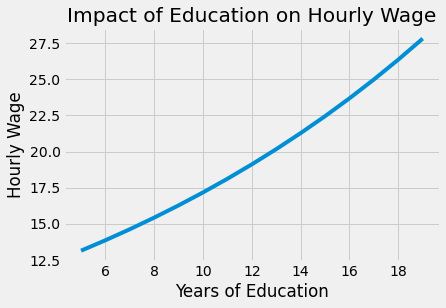

In [7]:
from matplotlib import pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")

x = np.array(range(5, 20))
plt.plot(x, np.exp(model_1.params["Intercept"] + model_1.params["educ"] * x))
plt.xlabel("Years of Education")
plt.ylabel("Hourly Wage")
plt.title("Impact of Education on Hourly Wage")
plt.show()

물론, 이 단순한 모형을 추정(estimate)할 수 있다고 해서 그 값이 정확하다고 할 수는 아닙니다. 제가 교육 기간으로부터 임금을 **예측할 수 있다**고 조심스럽게 말한 것 보세요. 저는 이 예측이 인과관계에 의한 것이라고 말한 적 없습니다. 사실 이 모델이 편향되어 있다고 믿을 만한, 아주 중대한 문제가 있습니다. 우리의 데이터는 무작위 실험에서 나온 것이 아니잖아요. 교육을 많이 받은 사람과 적게 받은 사람을 단순 비교하면 안 될지도 모릅니다. 아니죠, 저희의 경험에 비춰보자면 그 둘을 단순 비교하는 것은 확실하게 안 됩니다. 몇 년간 교육을 더 받은 사람들은 아마도 더 부유한 부모를 뒀을 것이고, 교육 기간을 늘렸을 때 나타난 임금 인상은 가족의 부와 교육 기간이 연관되어 있다는 증거라고 주장할 수도 있습니다. 수학적으로 말하자면 우리는 교육을 더 많이 받은 사람들은 그 교육을 받지 않았어도 어차피 더 높은 소득을 가질 것이라고, 즉 $E[Y_0|T=0] < E[Y_0|T=1]$라고 주장할 수도 있습니다. 교육에 대해 정말 부정적인 사람은 일할 시간을 뺏고 경력이 줄어들기 때문에 교육 기간이 임금을 *감소시킨다고* 말할 수도 있고요.

다행히도, 우리 데이터에는 다른 변수들도 있습니다. 부모의 교육 기간 `meduc`와 `feduc`, 그 사람의 `IQ` 점수, 경력 년수 `exper`, 그리고 회사에 재직한 기간 `tenure` 등을 알 수 있죠. 심지어 결혼 여부와 흑인 여부에 대한 더미 변수도 있습니다.

In [8]:
wage.head()

,wage,hours,lhwage,IQ,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc
0,769,40,2.956212,93,12,11,2,31,1,0,0,1,1,2.0,8.0,8.0
2,825,40,3.026504,108,14,11,9,33,1,0,0,1,1,2.0,14.0,14.0
3,650,40,2.788093,96,12,13,7,32,1,0,0,1,4,3.0,12.0,12.0
4,562,40,2.642622,74,11,14,5,34,1,0,0,1,10,6.0,6.0,11.0
6,600,40,2.708050,91,10,13,0,30,0,0,0,1,1,2.0,8.0,8.0


우리는 그 추가 변수들을 모두 포함한 모형을 추정할 수 있습니다.

$
log(hwage)_i = \beta_0 + \kappa \ educ_i + \pmb{\beta}X_i + u_i
$

이것이 왜 편향을 없애주는지 궁금하다면, 다변량 선형 회귀의 이변량 분석을 되짚어봅시다.

$
\kappa = \dfrac{Cov(Y_i, \tilde{T_i})}{Var(\tilde{T_i})} 
$

이 공식은 부모의 교육, IQ, 경력 등으로부터 교육기간 `educ`을 예측할 수 있다는 것을 말해줍니다. 이 작업을 수행하고 나면 이전에 포함된 모든 변수와 상관이 없는 버전의 `educ`, $\tilde{educ}$이 남습니다. "교육을 더 오래 받은 사람들은 IQ가 더 높기 때문에 교육을 많이 받은 것이다. 교육이 임금 인상으로 이어진 것이 아니라 IQ 때문에 임금이 높아진 것이다"고 주장하는 사람 있나요? 이 방식을 이용하면 이런 주장을 깨트릴 수 있습니다. 우리의 모형에 IQ를 포함한다면, $\kappa$는 IQ를 고정시키면서 교육기간을 추가했을 때의 반환값이 됩니다. 이것이 무엇을 의미하는지 생각해보고 넘어가세요. RCT를 해서 처치 집단과 비처치 집단을 동등하게 만들 수는 없지만, 회귀 모형에 다른 요소들을 포함하면 같은 효과를 낼 수 있습니다. 랜덤하게 얻은 데이터가 아닌데도요!

In [9]:
controls = ['IQ', 'exper', 'tenure', 'age', 'married', 'black',
            'south', 'urban', 'sibs', 'brthord', 'meduc', 'feduc']

X = wage[controls].assign(intercep=1)
t = wage["educ"]
y = wage["lhwage"]

beta_aux = regress(t, X)
t_tilde = t - X.dot(beta_aux)

kappa = t_tilde.cov(y) / t_tilde.var()
kappa

0.041147191010057635

우리가 방금 추정한 이 계수는 동일한 IQ, 경력, 재직 기간, 나이 등을 가진 사람들의 경우 교육 기간이 1년 늘어날 때마다 시간당 임금이 4.11% 상승한다는 뜻입니다. 처음에 `educ`만 포함해 만든 모형은 편향된 게 맞았네요! 또, 이러한 편향으로 인해 교육의 영향을 과대평가됐다는 것도 알 수 있습니다. 일단 다른 요소들을 통제하고 나면, 우리가 추정한 교육의 영향력은 줄어듭니다.

모든 것을 새로 코딩하는 대신 <del>머리를 써서</del> 다른 사람들이 만든 패키지를 사용한다면 신뢰구간도 구할 수 있습니다.

In [10]:
model_2 = smf.ols('lhwage ~ educ +' + '+'.join(controls), data=wage).fit()
model_2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.1156,0.232,4.802,0.000,0.659,1.572
educ,0.0411,0.010,4.075,0.000,0.021,0.061
IQ,0.0038,0.001,2.794,0.005,0.001,0.006
exper,0.0153,0.005,3.032,0.003,0.005,0.025
tenure,0.0094,0.003,2.836,0.005,0.003,0.016
age,0.0086,0.006,1.364,0.173,-0.004,0.021
married,0.1795,0.053,3.415,0.001,0.076,0.283
black,-0.0801,0.063,-1.263,0.207,-0.205,0.044
south,-0.0397,0.035,-1.129,0.259,-0.109,0.029
urban,0.1926,0.036,5.418,0.000,0.123,0.262


## Omitted Variable or Confounding Bias

아직 한 가지 의문점이 남아있습니다. 우리가 추정한 이 파라미터가 인과 관계일까요? 안타깝지만 우리는 확실하게 말할 수 없습니다. 첫 번째 세웠던 단순한 회귀모형의 파라미터는 인과 관계가 아닐 것입니다. 그 모형은 교육과 임금, 둘 다와 상관관계가 있는 중요한 변수들을 생략하니까요. 그것들을 통제하지 않으면 교육의 영향을 추정했을 때 회귀 모형에 포함되지 않은 다른 변수들의 영향도 같이 집계될 겁니다.

편향이 어떤 식으로 작용하는지 이해하기 위해, 교육과 임금의 상관관계가 실제로는 이런 모형을 따른다고 합시다.

$
Wage_i = \alpha + \kappa \ Educ_i + A_i'\beta + u_i
$

교육이 임금에 끼치는 영향은 $\kappa$의 크기와, 추가적인 능력 인자를 나타내는 벡터 $A$에 의해 측정됩니다. 우리의 모델에서 능력을 제거하면 $\kappa$에 대한 추정치는 다음과 같을 겁니다.

$
\dfrac{Cov(Wage_i, Educ_i)}{Var(Educ_i)} = \kappa + \beta'\delta_{Ability}
$

여기서 $\delta_{A}$는 $Educ$에 대한 회귀 모델에서 $A$의 계수 벡터입니다.

여기서 중요한 것은 그것이 우리가 원하는 $\kappa$와 정확히 같지는 않다는 것입니다. 대신, 귀찮지만 $\beta'\delta_{A}$라는 추가 항이 붙습니다. 이 항은 생략된 $A$가 $Wage$에 미치는 영향으로, 생략 변수가 $Educ$에 끼치는 영향에 $\beta$를 곱한 것입니다. 이것은 경제학자들에게 굉장히 중요한 사실입니다. 심지어 조슈아 앵그리스트는 학생들이 명상 중에 암송할 수 있는 문구까지 만들었죠.

```
"Short equals long 
plus the effect of omitted 
times the regression of omitted on included"
```

여기서, 짧은 회귀 분석(short)은 변수를 생략한 회귀 분석입니다. 긴 회귀 분석(long)은 그 변수들을 포함하는 회귀 분석이고요. 이 문구는 우리에게 편향의 본질에 대한 인사이트를 제공합니다. 첫째, 생략 변수가 종속 변수 $Y$에 영향을 미치지 않는다면 편향 항(bias term)은 0이 됩니다. 당연한 얘기죠? 교육이 임금에 미치는 영향을 이해하려고 할 때, 임금과 무관한 변수들 - 라일락의 키가 얼마나 되는지 등 - 을 통제할 필요는 없습니다. 둘째, 생략 변수가 처치 변수에 영향을 미치지 않는 경우에도 편향 항은 0이 됩니다. 이것도 직관적으로 말이 됩니다. 모델에 교육에 영향을 미치는 모든 요소들이 포함되어 있다면, 교육과 임금에 모두 영향을 끼치는 변수 때문에 추정치가 바뀌는 일은 없을 테니까요.

![img](data/img/linear-regression/confused_cat.png)

좀 더 깔끔하게 표현하자면, **모형에서 모든 교란 변수를 고려한 경우 OVB가 없다**고 말합니다. 여기서 인과 그래프에 대한 지식을 활용할 수 있습니다. 교란 변수는 **처치와 결과를 모두 유발하는** 변수입니다. 임금 사례에서 IQ는 교란 변수입니다. 높은 IQ를 가진 사람들은 교육을 더 오래 이어가는 경향이 있습니다. IQ 높은 사람들에게는 어렵지 않은 일이니까요. 그러니 우리는 IQ가 교육 기간에 영향을 준다고 말할 수 있습니다. 또한, IQ가 높은 사람들은 선천적으로 더 생산적인 경향이 있습니다. 그 결과 더 높은 임금을 받겠죠. 즉, IQ는 임금에도 영향을 줍니다. 교란 요인은 처치와 결과에 모두 영향을 미치는 변수이므로 T와 Y로 가는 화살표로 표시합니다. 여기서는 교란 변수를 $W$로 표시했습니다. 또, 양의 인과관계를 빨간색으로, 음의 인과관계를 파란색으로 표시했습니다.

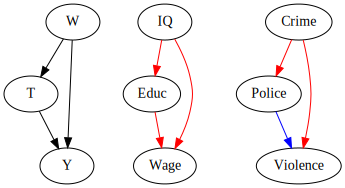

In [11]:
g = gr.Digraph()

g.edge("W", "T"), g.edge("W", "Y"), g.edge("T", "Y")

g.edge("IQ", "Educ", color="red"), g.edge("IQ", "Wage", color="red"), g.edge("Educ", "Wage", color="red")

g.edge("Crime", "Police", color="red"), g.edge("Crime", "Violence", color="red"), 
g.edge("Police", "Violence", color="blue")

g

인과 그래프는 우리가 세상을 어떻게 이해하는지를 표현해줍니다. 또, 교란 편향이 어떻게 작동하는지 이해하는 데에도 유용한 도구입니다. 우리의 첫 번째 예시에서, 교육이 임금을 유발하는 그래프를 얻을 수 있습니다. 더 많은 교육은 더 높은 임금을 초래합니다. 하지만 IQ는 임금도 유발하고 교육도 유발합니다. IQ가 높으면 교육 기간도 임금도 높아지니까요. 우리의 모형이 IQ를 통제하지 않는다면, IQ가 임금에 미치는 영향의 일부가 교육과의 상관관계를 통해 흐를 겁니다. 그러면 교육의 영향을 과대평가하게 되겠죠. 이것은 양의 편향(positive bias)의 한 예입니다.

또 다른 예를 들어볼까요? 이번에는 음의 편향(negative bias)의 예시를 봅시다. 경찰이 도시 폭력에 미치는 영향에 대한 인과 그래프를 생각해봅시다. 우리는 경찰력이 더 많은 도시에 더 많은 폭력 사건이 일어나는 경우가 흔히 있습니다. 이게 경찰이 폭력을 일으킨다는 뜻일까요? 글쎄요, 그럴 수도 있겠죠. 그에 대해 토론을 벌일 필요는 없을 것 같습니다. 하지만 교란 변수로 인해 폭력에 대한 경찰의 영향력을 편향적으로 바라볼 가능성이 더 높을 겁니다. 경찰력이 증가하면 폭력을 감소할 확률이 높습니다. 하지만 '범죄'라는 세 번째 변수는 더 많은 폭력과 더 많은 경찰력을 유발합니다. 우리가 그것을 고려하지 않는다면, 폭력에 대한 범죄의 영향은 경찰력을 통해 흘러갈 것입니다. 그럼 경찰력이 폭력을 증가시키는 것처럼 보이겠죠. 이것은 음의 편향의 예시입니다.

우리는 인과 그래프를 통해 회귀나 RCT가 교란 편향을 보정하는 방식도 확인할 수 있습니다. RCT는 처리 변수에 대한 교란 변수의 연결을 끊어서 그 효과를 보정합니다. 정의상, $T$를 랜덤으로 만들면 교란 편향은 사라지니까요.

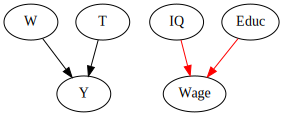

In [12]:
g = gr.Digraph()

g.edge("W", "Y"), g.edge("T", "Y")

g.edge("IQ", "Wage", color="red"), g.edge("Educ", "Wage", color="red")

g

반면, 회귀 분석은 교란 변수 $W$를 고정하고 $T$의 효과를 비교하여 교란 변수의 효과를 보정합니다. 회귀 분석에서는 W가 여전히 T와 Y를 유발하하고 있습니다. 다만, 그 값이 고정되어 있기 때문에 T와 Y의 변화에 영향을 줄 수 없을 뿐이죠.

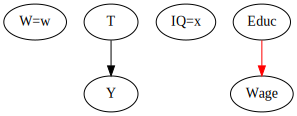

In [13]:
g = gr.Digraph()

g.node("W=w"), g.edge("T", "Y")
g.node("IQ=x"), g.edge("Educ", "Wage", color="red")

g

이제 원래 질문으로 돌아갑시다. 우리는 교육 기간(`educ`)이 임금에 미치는 영향을 추정했습니다. 이 파라미터가 인과관계일까요? 미안한 말이지만, 모든 교란 요인이 모델에 포함되었다고 말할 수 있느냐 아니냐에 따라 달라집니다. 개인적으로, 저는 이 사례에서는 부족했다고 생각합니다. 예를 들어, 우리는 가족의 재산을 포함하지 않았습니다. 가족의 교육 기간을 포함하긴 했지만, 그건 부를 간접적으로 보여주는 것에 불과하죠. 우리는 또한 개인적인 야망과 같은 요소들을 고려하지 않았습니다. 야망은 더 오랜 교육 기간과 더 높은 임금 모두를 유발할 수 있으니, 교란 변수로 볼 수 있습니다. 이것은 **랜덤하지 않은, 또는 관측 데이터를 사용한 인과 추론은 항상 어림짐작**으로 간주해야 한다는 것을 보여주기 위한 것입니다. 우리는 모든 교란 변수를 고려했는지 결코 확신할 수 없습니다.


## Key Ideas

우리는 회귀를 이용해 많은 작업을 해결했습니다. 회귀 분석을 사용하여 A/B 검사를 수행하는 방법을 보았고, 간편하게 신뢰 구간을 얻는 방법도 확인했죠. 그런 다음 회귀 분석으로 이 예측 문제를 해결할 수 있다는 것을 보았습니다. 선형 회귀가 조건부 기대 함수(CEF)에 대한 최상의 선형 근사치죠. 또한 이변량의 경우 회귀 처치 계수가 처치와 결과 사이의 공분산을 처치의 분산으로 나눈 값이라는 것도 보았습니다. 다변량 사례로 확장하자면, 회귀 분석은 처치 계수에 대한 부분적인 해석을 제공하는 방법을 알아냈습니다. 다른 포함된 변수 모두를 일정하게 유지하면서, 처치에 따라 결과가 어떻게 변화하는지로 해석하는 거죠. 경제학자들의  용어로는 *ceteris paribus(다른 조건이 동일하다면)*라고 하는 상황입니다.

마지막으로, 우리는 편향을 어떻게 이해해야 할지를 다뤘습니다. `Short equals long plus the effect of omitted times the regression of omitted on included`라는 말의 의미를 살펴봤죠. 이것은 편향이 어떻게 생겨났는지를 보여줍니다. 우리는 생략된 변수 편향이 교란 변수 - 처치와 결과에 모두 영향을 미치는 변수 - 때문이라는 걸 알게 되었습니다. 끝으로, 우리는 인과 그래프를 이용해 RCT 및 회귀 분석이 교란을 수정하는 방법을 확인했습니다.

## References

저는 이 책을 Joshua Angrist, Alberto Abadie 및 Christopher Walters의 대단한 계량 경제학 수업에 대한 찬사라고 생각하고 싶습니다. 이 자료에 있는 대부분의 아이디어는 전미경제학회(American Economic Association)의 수업에서 가져왔어요. 이렇게 좋은 참고자료를 지켜보는 것이 저의 2020년의 힘든 한 해 동안, 온전한 정신을 유지하도록 도와주었어요.

* [Cross-Section Econometrics](https://www.aeaweb.org/conference/cont-ed/2017-webcasts)
* [Mastering Mostly Harmless Econometrics](https://www.aeaweb.org/conference/cont-ed/2020-webcasts)


또한 Angrist의 정말 좋은 책들을 참고자료 목록에 담고 싶습니다. 이 책들은 계량경제학(Econometrics) 또는 '메트릭스(Metrics, 계량적 분석)'가 매우 유용할 뿐만 아니라 매우 재미있다는 것을 저에게 보여주었습니다.

* [Mostly Harmless Econometrics](https://www.mostlyharmlesseconometrics.com/)
* [Mastering 'Metrics](https://www.masteringmetrics.com/)

제가 참고한 또다른 자료는 Miguel Hernan과 Jamie Robins의 책입니다. 이 책들은 제가 대답해야 했던 까다로운 인과적인 질문에서 신뢰할 수 있는 동반자와 같은 존재였어요.

* [Causal Inference Book](https://www.hsph.harvard.edu/miguel-hernan/causal-inference-book/)

마지막으로, Scott Cunningham과 인과 추론과 Mixtape 형태를을 결합한 그의 훌륭한 작업에도 찬사를 보냅니다.

* [Causal Inference: The Mixtape](https://www.scunning.com/mixtape.html)

![img](./data/img/poetry.png)

## Contribute

Causal Inference for the Brave and True는 인과추론, 통계학에 대한 오픈소스 자료입니다. 이 자료는 금전적으로나 지적으로 접근이 가능할 수 있도록 하는 것이 목표입니다. 그리고, 이 책은 Python 기반의 무료 소프트웨어만 사용해요.
여러분들께서 이 자료가 가치 있다고 생각하시고, 금전적으로 지원을 원하신다면 [Patreon](https://www.patreon.com/causal_inference_for_the_brave_and_true)를 방문해주세요. 
만약 여러분이 금전적으로 기여하기가 쉽지 않으시다면, 오타 수정, 수정 제안, 이해하기 난해한 부분에 대한 피드백 제공 등을 통해 도움을 주실 수 있어요. 이 책의 Github 저장소 [이슈 페이지](https://github.com/matheusfacure/python-causality-handbook/issues)를 방문해주세요. 마지막으로 이 자료가 여러분의 마음에 드셨다면 도움이 될 수 있는 다른 사람들과 공유해주시고, [이 책의 Github 자료에 star](https://github.com/matheusfacure/python-causality-handbook/stargazers) 부탁드립니다!